In [2]:
import warnings 
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from scipy.stats import zscore

###### Read the column description and ensure you understand each attribute well

In [3]:
BankPersonal_df=pd.read_csv('Bank_Personal_Loan_Modelling.csv')
BankPersonal_df.sample(n=10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
2013,2014,40,15,52,92691,3,0.8,3,113,0,0,0,1,0
4558,4559,44,19,82,95521,2,0.4,1,0,0,0,0,1,1
3995,3996,53,28,34,92697,2,0.6,3,0,0,0,0,1,1
4845,4846,45,21,128,94305,1,4.7,1,0,0,0,0,0,0
2195,2196,51,27,33,92037,4,0.2,1,83,0,0,0,1,0
3545,3546,48,22,174,95827,1,2.4,1,0,0,0,0,1,0
552,553,28,3,52,90024,4,2.2,1,230,0,0,0,1,0
684,685,43,17,164,90266,1,2.4,1,449,0,0,0,1,0
4324,4325,49,24,13,94538,4,0.8,1,111,0,0,0,1,0
1031,1032,56,32,25,95403,1,0.1,2,136,0,0,0,1,0


In [4]:
BankPersonal_df.shape

(5000, 14)

###### Study the data distribution in each attribute, share your findings. (5 points)

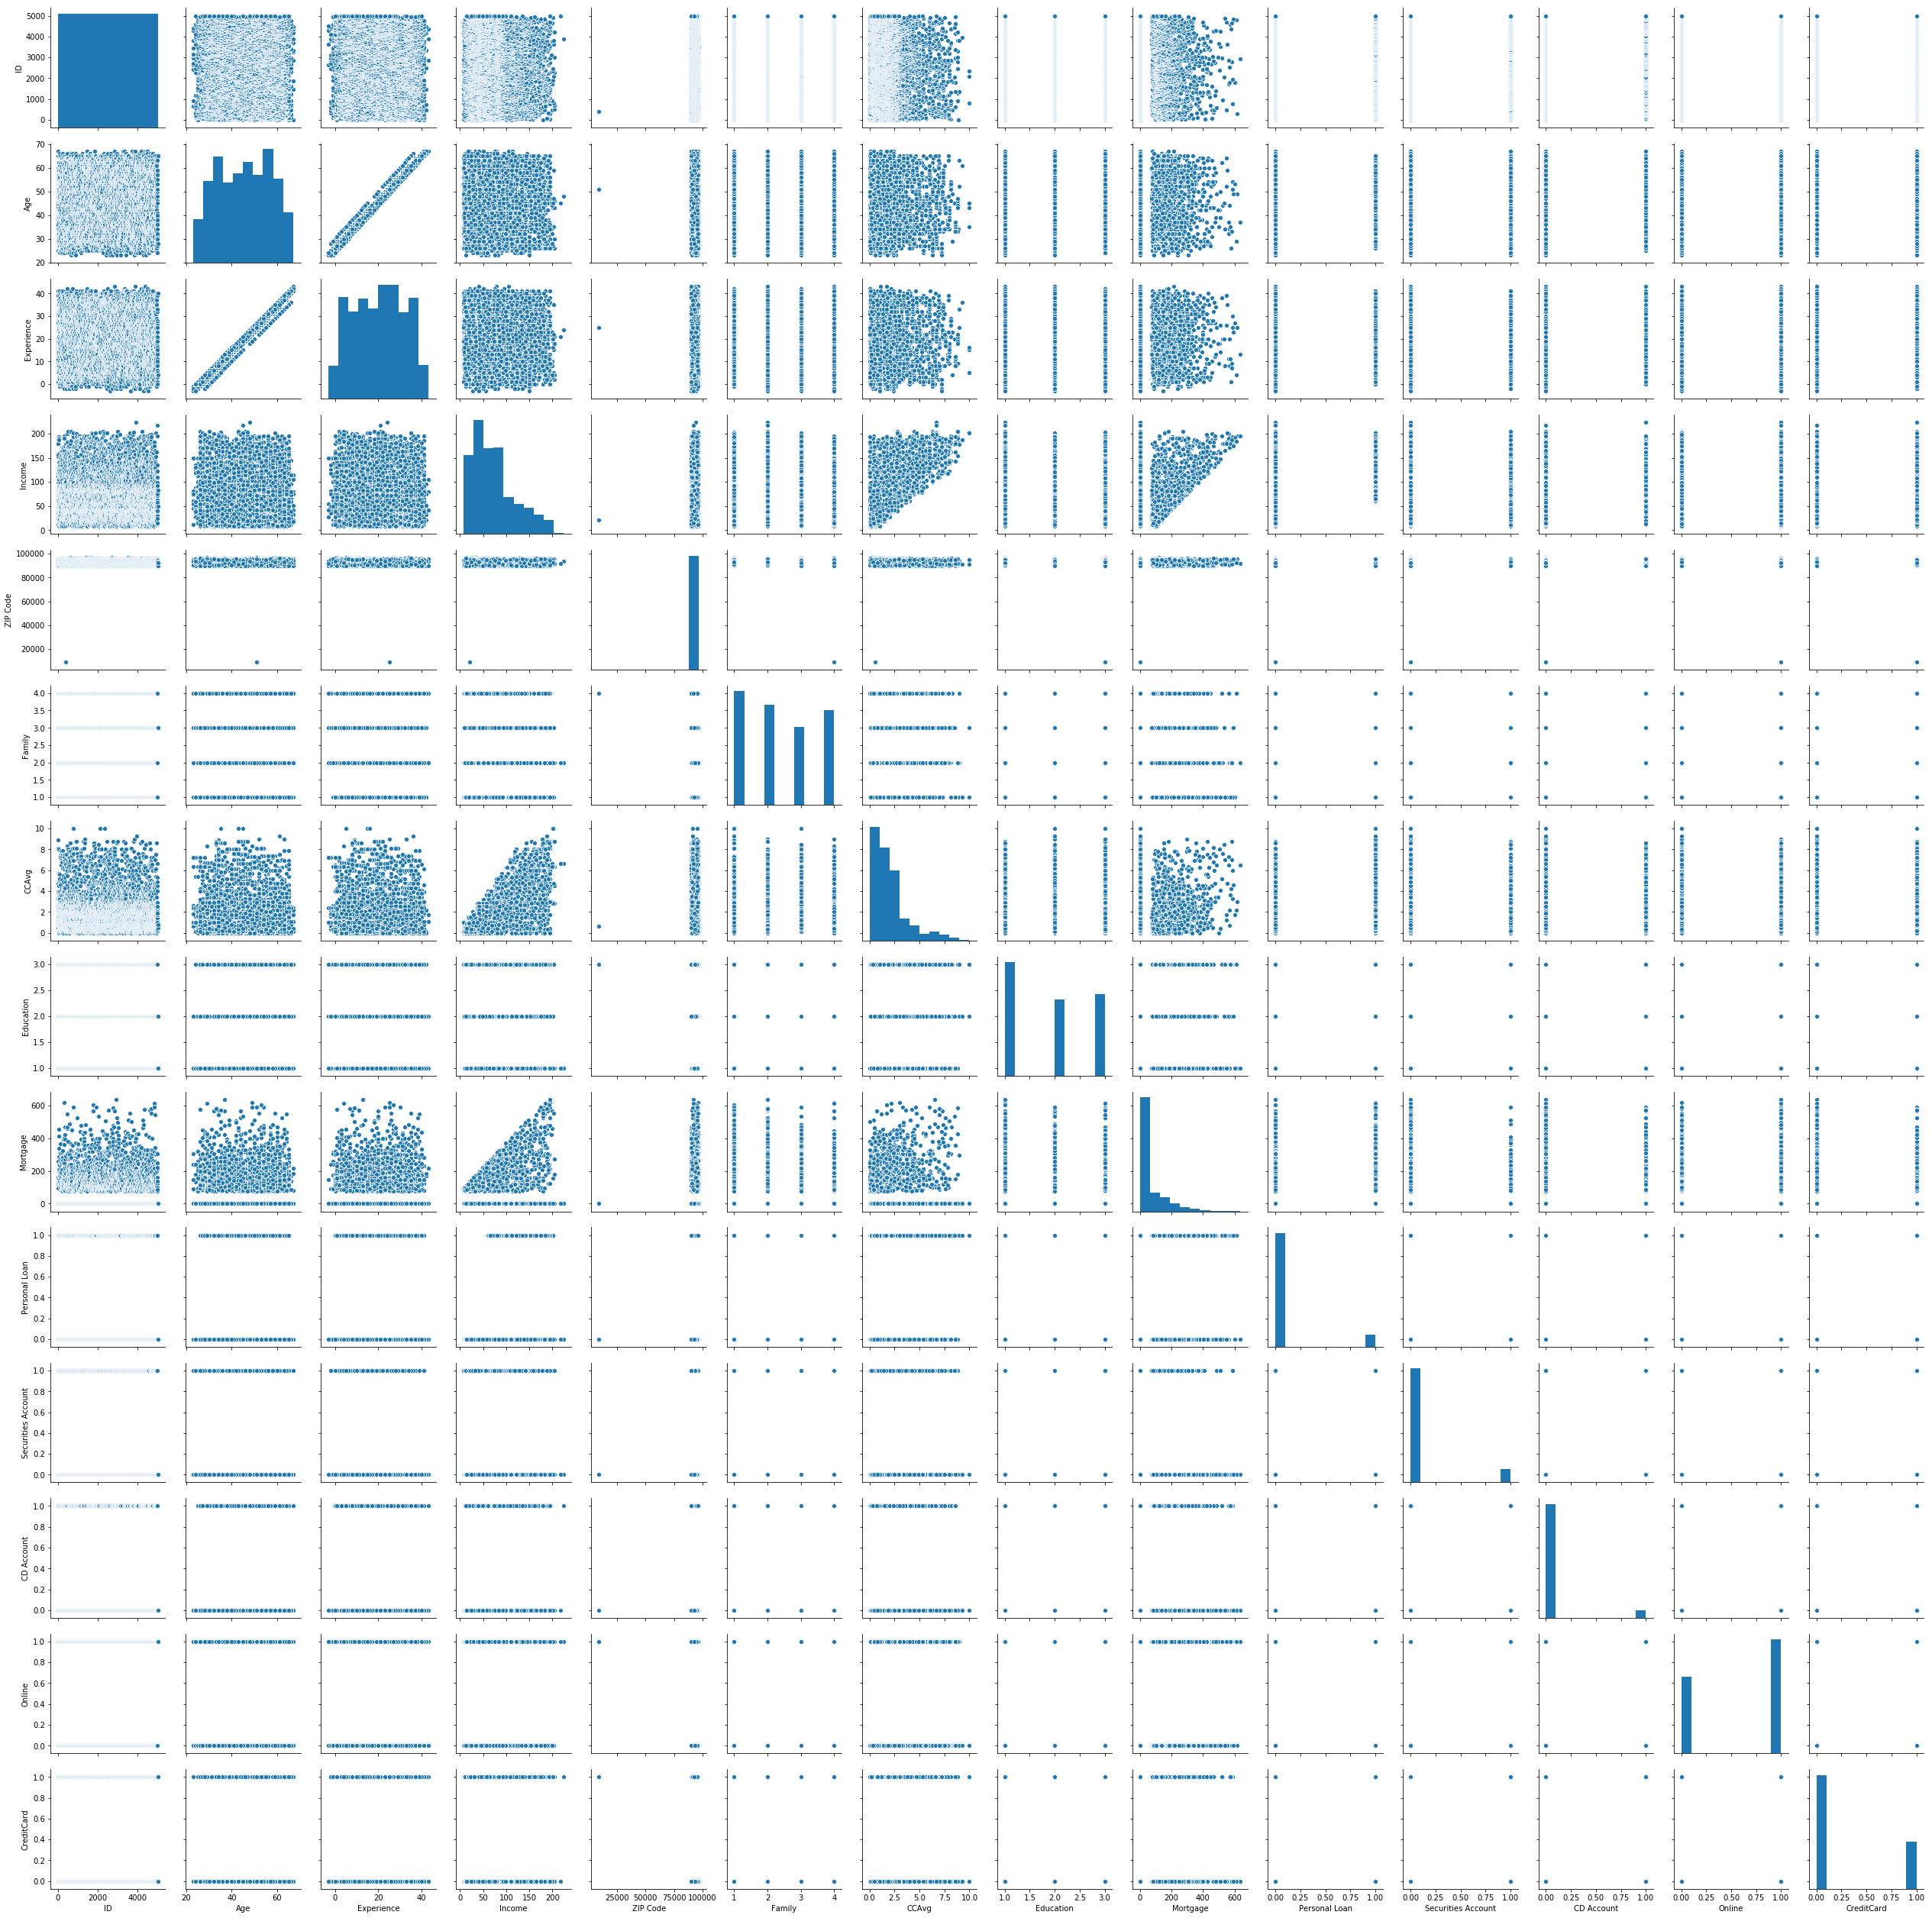

In [5]:
sns.pairplot(BankPersonal_df,kind='scatter')

In [27]:
BankPersonal_df.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


###### From the pair plot and heatmap its clear that the target column 'Personal Loan' is negetively corelated with age and Experience. The maximum corelation is with Income 

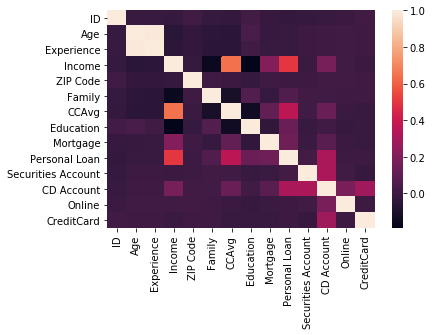

In [6]:
sns.heatmap( BankPersonal_df.corr())

In [7]:
X=BankPersonal_df.drop('Personal Loan',axis=1)
y=BankPersonal_df[['Personal Loan']]
X = X.apply(zscore)

###### Split the data into training and test set in the ratio of 70:30 respectively

In [8]:
test_size=0.30
seed=7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

###### Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans (15 points)

###### Print the confusion matrix for all the above models (5 points)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [11]:
K_vect=[3,5,9]

In [12]:
for K in K_vect:
    NNH = KNeighborsClassifier(n_neighbors= K)
    NNH.fit(X_train, y_train)
    predicted_labels = NNH.predict(X_test)
    #print(NNH.score(X_test, y_test))
    print('The accuracy of the KNN is',accuracy_score(y_test,predicted_labels),'FOR k=',K) 


C:\Users\kumar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


The accuracy of the KNN is 0.9553333333333334 FOR k= 3
The accuracy of the KNN is 0.9566666666666667 FOR k= 5


C:\Users\kumar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\kumar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


The accuracy of the KNN is 0.9526666666666667 FOR k= 9


In [13]:
print('The confusion matrix of the GNB is',metrics.confusion_matrix(predicted_labels,y_test))

The confusion matrix of the GNB is [[1356   65]
 [   6   73]]


In [14]:
#Load all required library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

In [15]:
GNB = GaussianNB()

In [16]:
GNB.fit(X_train,y_train)

C:\Users\kumar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [17]:
y_pred=GNB.predict(X_test)

In [18]:
print('The accuracy of the GNB is',metrics.accuracy_score(y_pred,y_test))

The accuracy of the GNB is 0.8773333333333333


In [19]:
print('The confusion matrix of the GNB is',metrics.confusion_matrix(y_pred,y_test))

The confusion matrix of the GNB is [[1236   58]
 [ 126   80]]


In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [22]:
regression_model.score(X_test, y_test)

0.3820977591203958

In [23]:
from sklearn.linear_model import LogisticRegression
# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, auc

In [24]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

C:\Users\kumar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [25]:
model_score = model.score(X_test, y_test)
model_score

0.9526666666666667

In [26]:
metrics.confusion_matrix(y_predict, y_test)

array([[1341,   50],
       [  21,   88]], dtype=int64)